In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
pd.options.display.float_format="{:,.3f}".format

In [25]:
#Loading dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
features=pd.DataFrame(data.data,columns=data.feature_names)
label=pd.DataFrame(data.target,columns=["Price"])
df=pd.concat([features,label],axis=1)

In [133]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230,4.526
1,8.301,21.000,6.238,0.972,"2,401.000",2.110,37.860,-122.220,3.585
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240,3.521
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250,3.413
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250,3.422


In [21]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [29]:
new_df=df[['AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
  'HouseAge',
  'MedInc',
   'Price']]

new_df.head()

,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseAge,MedInc,Price
0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,41.0,8.3252,4.526
1,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,21.0,8.3014,3.585
2,8.288136,1.073446,496.0,2.802260,37.85,-122.24,52.0,7.2574,3.521
3,5.817352,1.073059,558.0,2.547945,37.85,-122.25,52.0,5.6431,3.413
4,6.281853,1.081081,565.0,2.181467,37.85,-122.25,52.0,3.8462,3.422


In [30]:
X=new_df.iloc[:,:7]
y=new_df[["MedInc","Price"]]

In [40]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [41]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)
y_test=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

In [42]:
#Importing libraries to create the Neural Network using the Keras Functional API
from keras.layers import Dense,Input
from keras.models import Model

In [43]:
input=Input(shape=(X.shape[1],))
model=Dense(100,activation="relu")(input)
model=Dense(200,activation="relu")(model)
model=Dense(2)(model)
modelo=Model(input,model)

In [44]:
modelo.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_6 (Dense)             (None, 100)               800       
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 2)                 402       
                                                                 
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________


In [96]:
modelo.compile(optimizer="adam",loss=["mse"])
history=modelo.fit(X_train,[y_train.iloc[:,0],y_train.iloc[:,1]],epochs=200,validation_split=0.3,batch_size=16)

Epoch 1/200
633/633 [==============================] - 3s 4ms/step - loss: 0.1087 - val_loss: 0.2494
Epoch 2/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1096 - val_loss: 0.2538
Epoch 3/200
633/633 [==============================] - 2s 3ms/step - loss: 0.1099 - val_loss: 0.2661
Epoch 4/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1080 - val_loss: 0.2445
Epoch 5/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1086 - val_loss: 0.2485
Epoch 6/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1067 - val_loss: 0.2480
Epoch 7/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1090 - val_loss: 0.2425
Epoch 8/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1073 - val_loss: 0.2445
Epoch 9/200
633/633 [==============================] - 2s 3ms/step - loss: 0.1067 - val_loss: 0.2581
Epoch 10/200
633/633 [==============================] - 2s 4ms/step - loss: 0.1064 - val_lo

633/633 [==============================] - 3s 4ms/step - loss: 0.0887 - val_loss: 0.2661
Epoch 82/200
633/633 [==============================] - 3s 4ms/step - loss: 0.0886 - val_loss: 0.2595
Epoch 83/200
633/633 [==============================] - 3s 4ms/step - loss: 0.0874 - val_loss: 0.2630
Epoch 84/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0862 - val_loss: 0.2716
Epoch 85/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0888 - val_loss: 0.2619
Epoch 86/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0876 - val_loss: 0.2635
Epoch 87/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0847 - val_loss: 0.2578
Epoch 88/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0869 - val_loss: 0.2744
Epoch 89/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0862 - val_loss: 0.2693
Epoch 90/200
633/633 [==============================] - 3s 4ms/step - loss: 0.0857 - val_loss: 

Epoch 161/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0760 - val_loss: 0.2858
Epoch 162/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0745 - val_loss: 0.2877
Epoch 163/200
633/633 [==============================] - 3s 4ms/step - loss: 0.0747 - val_loss: 0.2833
Epoch 164/200
633/633 [==============================] - 3s 4ms/step - loss: 0.0753 - val_loss: 0.2832
Epoch 165/200
633/633 [==============================] - 3s 4ms/step - loss: 0.0761 - val_loss: 0.2877
Epoch 166/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0732 - val_loss: 0.2835
Epoch 167/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0756 - val_loss: 0.2841
Epoch 168/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0739 - val_loss: 0.2921
Epoch 169/200
633/633 [==============================] - 2s 4ms/step - loss: 0.0787 - val_loss: 0.2975
Epoch 170/200
633/633 [==============================] - 2s 4ms/step - lo

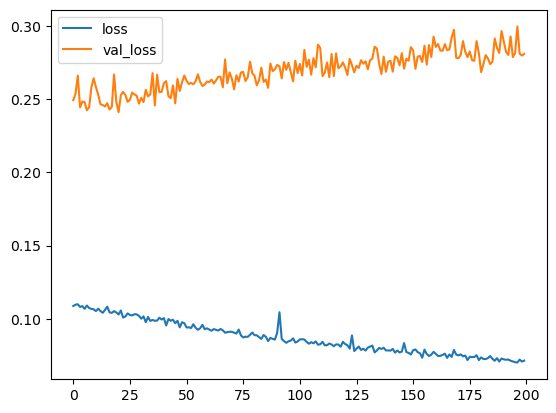

In [107]:
##Plotting MSE for training and validation
pd.DataFrame(history.history).plot()
plt.show()

In [108]:
#Evaluating the model
results=np.array(modelo.evaluate(X_test,[y_test.iloc[:,0],y_test.iloc[:,1]],verbose=False))
print("MSE")
print(results.round(3))

MSE
0.258


In [131]:
##Making a comparison of the the real values vs  predited values 
real=pd.DataFrame(scaler_y.inverse_transform(pd.DataFrame(y_train.iloc[0:10,:]).values),columns=["Real MedInc","Real Price" ])
predicted=pd.DataFrame((scaler_y.inverse_transform(modelo.predict(X_train.iloc[0:10,:],verbose=False))),columns=["Predicted MedInc","Predicted Price" ])
dfx=pd.concat([real,predicted] ,axis=1)
comparison=dfx[['Real MedInc', 'Predicted MedInc' ,'Real Price',  'Predicted Price']]
comparison

,Real MedInc,Predicted MedInc,Real Price,Predicted Price
0,4.131,5.169,1.938,2.854
1,2.863,2.951,1.697,1.507
2,4.203,4.081,2.598,2.194
3,3.109,3.017,1.361,1.547
4,3.307,3.916,5.000,2.093
5,4.079,4.474,2.813,2.432
6,2.425,2.653,2.161,1.326
7,2.771,2.434,1.174,1.193
8,3.975,3.222,5.000,1.671
9,3.951,4.036,1.042,2.166
